# Predykcja wytrzymałości na ściskanie na podstawie rzeczywistych danych wpisanych

Za pomocą bibloteki "pickle" model został wyciągnięty oraz zserializowany w celu dalszego użytkowania.
Do uruchomienia niniejszego skryptu niezbędna jest instalacja:
1. Pythona w wersji 3.6 +
2. Bibliotek pickle, pandas, numpy (Wszystkie biblioteki są domyślnie zainstalowane w pakietach Anaconda lub WinPython)

Jest to wersja przeznaczona dla systemów Linux lub też systemów nieposiadających Excela. 
Wszystkie biblioteki powinny się domyślnie zainstalować. 

Arkusz można odpalić również online w narzędziu Colab notebooks


Uruchamiaj po kolei poszczególne kolumny aby móc edytować wartości w pliku Excel

In [187]:
try:
    import pickle
except:
    %pip install pickle
    import pickle
try:
    import xlwings as xw
except:
    %pip install xlwings
    import xlwings as xw
try:
    import numpy as np
except:
    %pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
try:
    import sklearn
except:
    %pip install sklearn
    import sklearn
try:
    import webbrowser as webpd
except:
    %pip install webbrowser
    import webbrowser as webpd


W tym kroku przypiszemy wartości poszczególnych składników mieszaki betonowej

In [188]:
rows = [430,0, 0, 178.5, 8.0, 1001.9, 688.7, 28]

In [189]:
columns = ['cement [kg/m3]',"żużel_wielkopiecowy [kg/m3]",
       'popiół_lotny [kg/m3]', 'woda [kg/m3]',
       'superplastyfikator [kg/m3]', 'kruszywo_grube [kg/m3]',
       'kruszywo_drobne [kg/m3]', 'wiek [dni]']

In [190]:
predicted = pd.DataFrame([dict(zip(columns,rows))])
predicted

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
0,430,0,0,178.5,8.0,1001.9,688.7,28


## Otwieramy teraz zapisane wcześniej modele

Model oparty na drzewach decyzyjnych

In [191]:
with open (r"modelPickle", "rb") as model_dat:
    model = pickle.load(model_dat)

Model wykorzystujący strukturę wzmacniającą gradient

In [192]:
with open (r"modelPickle2", "rb") as model_dat2:
    model2 = pickle.load(model_dat2)

I podstawiamy nasze przykładowe dane do wytrenowanego modelu

In [193]:
print(model.predict(predicted)[0], "MPa") #Drzewo decyzyjne

52.3 MPa


In [194]:
print(model2.predict(predicted)[0], "MPa") #Gradient boost

51.195663093324114 MPa


## Zedytuj teraz arkusz Google klikając w poniższy link podstawiając własne dane :)

In [195]:
sheet_url = r"https://docs.google.com/spreadsheets/d/1ExJzMHVX6DPa7SIrhyfhSgiNhnXpAPjJm1IjL8BtF4s/edit#gid=0"

webpd.open(sheet_url)

True


Możesz teraz zedytować swoje wartości w otwartym arkuszu google. 

Po edycji wykonaj poniższą komórkę


In [196]:
url = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
predicted2 = pd.read_csv(url)
for column in predicted2.columns:
    if predicted2[column].dtype == "object":
       predicted2[column] = predicted2[column].str.replace(',', '.').astype(float)


predicted2

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
0,200,0,0,120,8,999.9,788.5,28


In [197]:
wynik_dt = model.predict(predicted2)[0] #Drzewo decyzyjne

print(wynik_dt, "MPa")

38.5 MPa


In [198]:
wynik_Xboost = model2.predict(predicted2)[0] #Gradient boost

print(wynik_Xboost, "MPa")

31.307255881234536 MPa


## Jeżeli chcesz wykonać obliczenia dla innego zestawu danych to nie zamykaj pliku excel tylko wpisz ponowne wartości i uruchom ponownie poniższą komórkę

In [199]:
przyrost_dt = []
przyrost_xb = []


own_predict = pd.read_csv(url)
for column in own_predict.columns:
    if own_predict[column].dtype == "object":
       own_predict[column] = own_predict[column].str.replace(',', '.').astype(float)

wynik_dt = model.predict(own_predict)[0] #Drzewo decyzyjne
wynik_Xboost = model2.predict(own_predict)[0] #Gradient boost

for i in range(1,29):
    own_predict.loc[0,"wiek [dni]"] = i

    wynik_dt = model.predict(own_predict)[0] #Drzewo decyzyjne
    wynik_Xboost = model2.predict(own_predict)[0] #Gradient boost

    przyrost_dt.append(wynik_dt)
    przyrost_xb.append(wynik_Xboost)


tbl = pd.DataFrame(list(zip(przyrost_dt,przyrost_xb)), columns=["Przyrost drzewo decyzyjne","Przyrost xBoost"], index=np.arange(1, len(przyrost_dt)+1))


Dodanie tabeli pokazującej przyrost wytrzymałości w czasie

tbl

Dodanie wykresu ilustrującego wykres przyrostu wytrzymałości w czasie

[Text(0.5, 0, 'Czas w dniach'),
 Text(0, 0.5, 'Przyrost wytrzymałości na ściskanie w czasie')]

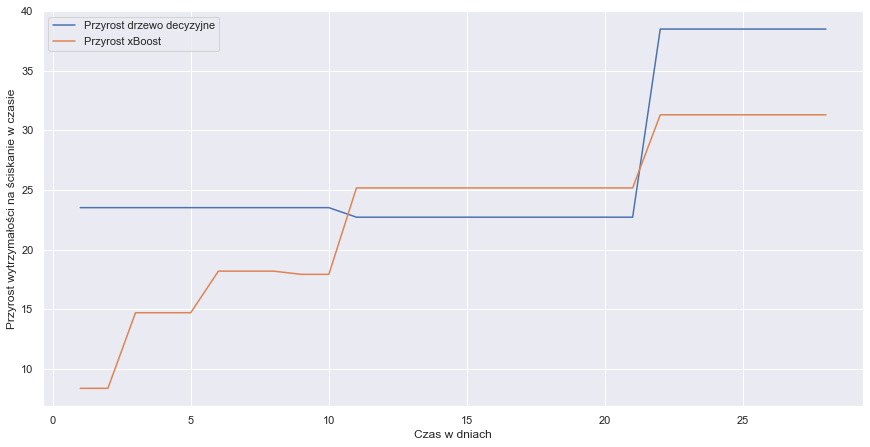

In [201]:
sns.set_style("dark")

sns.set(rc={'figure.figsize':(14.7,7.27)})
ax = sns.lineplot(data=tbl,
    dashes=False)

ax.set(xlabel='Czas w dniach', ylabel='Przyrost wytrzymałości na ściskanie w czasie')


## Na podstawie danych możemy stwierdzić że algorytm uczenia maszynowego oparty na gradient boostingu daje najbardziej rzeczywiste rezultaty

Zachęcam do testowania na własnych rzeczywistych danych
